# Tasks

In [1]:
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

# Square Root of 2

To calculate the square root of a number in python you need to use the power operator, x ** y, where x is the number you would like to get the square root of and y is 0.5. This is based on the mathmatical property of $\sqrt{x}$ = $x^{\frac{1}{2}}$, i.e. the square root of a number is equal to that number to the power of ${\frac{1}{2}}$.

Using a common example, we know that $\sqrt{4} = 2$.

Conversely $2^{2} = 4$.

Now raise both to the half power.

$2^{2^\frac{1}{2}} = 4^{\frac{1}{2}}$

When raising a power to another power you multiply them.

$2^{2\times \frac{1}{2}} = 2^1 = 2$

So from this we can infer that $2 = 4^{\frac{1}{2}}$ and subsequently $\sqrt{4} = 4^{\frac{1}{2}}$.

The following function will calculate the square root of 2 and given that the 2 is not a perfect square it will return an irrational number, one that cannot be expressed as a simple fraction. As such the function will return the square root of 2 to 100 places. 

In [2]:
# https://realpython.com/python-square-root-function/

# define function 
def sqrt2():
    
    n = 2  # variable containing the number 2
    
    n_sqrt = n ** 0.5 # variable containing square root of 2 
    
    # print the square root of 2 to 100 places
    print('The square root of %d is %.100f'% (n, n_sqrt))

In [3]:
sqrt2()

The square root of 2 is 1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


# Chi-Square Test

The [Wikipedia article](https://en.wikipedia.org/wiki/Chi-squared_test) has an example of the chi-squared test where a a random sample of 650 people is taken from a hypothetical city of 1,000,000 residents with with four neighbourhoods. Each resident in this sample is designated white collar, blue collar, or no collar designated based on their occupation. A table based on this is displayed below. 

In [4]:
cols = ['A', 'B', 'C', 'D']
data = pd.DataFrame(columns=cols)

data.loc['White Collar'] = [90, 60, 104, 95]
data.loc['Blue Collar'] = [30, 50, 51, 20]
data.loc['No collar'] = [30, 40, 45, 35]

print (data)

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No collar     30  40   45  35


In [5]:
stat, p, dof, expected = chi2_contingency(data)
print(round(stat,1))

24.6


Running the [chi2 contingency test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) from scipy.stats yields the same result as the wikipedia article, 24.6. This result will examined in closer detail below by calculating the expected values for blue collar workers, white collar workers, and no collar workers and calculating the chi-square values of each category to see if the correlate with this result.

In [6]:
print(p)

0.0004098425861096696


The first step is to calculate the expected values for each "collar". This is done by multiplying the total of a neighbourhood by the total of a collar divided by the overall total sampled, 650. A chi-squared test is then run on the actual values against the expected values. 

### White Collar 

In [7]:
ex_A = round(150 * 349 / 650, 2)
ex_B = round(150 * 349 / 650, 2)
ex_C = round(200 * 349 / 650, 2)
ex_D = round(150 * 349 / 650, 2)

ex_W = [ex_A, ex_B, ex_C, ex_D]

ex_W

[80.54, 80.54, 107.38, 80.54]

In [8]:
chisquare([90, 60, 104, 95], f_exp=[80.54, 80.54, 107.38, 80.54])

Power_divergenceResult(statistic=9.051944772302694, pvalue=0.0286081655305345)

### Blue Collar

In [9]:
ex_A = round(150 * 151 / 650, 2)
ex_B = round(150 * 151 / 650, 2)
ex_C = round(200 * 151 / 650, 2)
ex_D = round(150 * 151 / 650, 2)

ex_B = [ex_A, ex_B, ex_C, ex_D]

ex_B

[34.85, 34.85, 46.46, 34.85]

In [10]:
chisquare([30, 50, 51,20], f_exp=[34.85, 34.85, 46.46, 34.85])

Power_divergenceResult(statistic=14.032379288643106, pvalue=0.002861408674466977)

### No Collar

In [11]:
ex_A = round(150 * 150 / 650, 2)
ex_B = round(150 * 150 / 650, 2)
ex_C = round(200 * 150 / 650, 2)
ex_D = round(150 * 150 / 650, 2)

ex_N = [ex_A, ex_B, ex_C, ex_D]

ex_N

[34.62, 34.62, 46.15, 34.62]

In [12]:
chisquare([30, 40, 45, 35], f_exp =[34.62, 34.62, 46.15, 34.62])

Power_divergenceResult(statistic=1.4854214305072317, pvalue=0.6856391210459625)

In [13]:
white_collar = 9.051944772302694
blue_collar = 14.032379288643106
no_collar = 1.4854214305072317
cs = round(white_collar + blue_collar + no_collar, 1)
cs

24.6

# Standard Deviation

In [14]:
# generated random sample from np.random
x = np.random.standard_normal(100)

The difference between STDEV.p and STDEV.s is that STDEV.s applies [Bessel's Correction]() of n-1.

As taken from the tasks instruction, the standard deviation, in this case STDEV.p, of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

In the case of STDEV.s, the standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1).

The standard deviation is a measure of variation in a given set of values. A random sample of 100 values was generated in the normal distribution as the standard deviation would be expected to be 1. 

In [15]:
# STDEV.p
sdp = np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
sdp

1.0695761786276319

In [16]:
# STDEV.s
sds = np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))
sds

1.0749645058212118

As seen in the above examples, the standard deviation is closer to 1 when the standard deviation is calculated using STDEV.s

## K-means clustering

In [69]:
iris = datasets.load_iris()
X = iris.data

In [70]:
km = KMeans(n_clusters = 3, random_state=21).fit(X)

In [71]:
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


K-means clustering demonstrates clear delineation between each species of iris flowers contained in Fisher's dataset. As a consequence of this a prediction can be made as to which species a given flower is based on measurements of sepal length and width. 

AttributeError: 'KMeans' object has no attribute 'labels_'

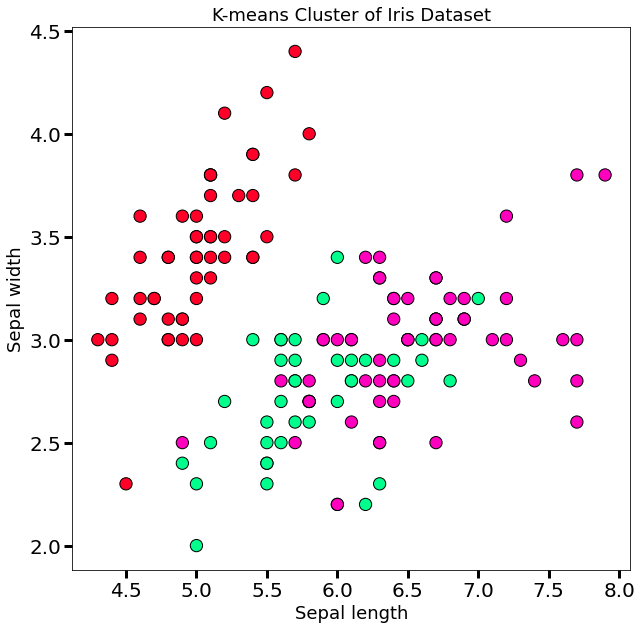

In [100]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.tick_params(direction='out', length=8, width=3, colors='k', labelsize=20)
plt.title("K-means Cluster of Iris Dataset", fontsize=18)
plt.legend(handles=[])
plt.show()